In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pnevmoniya/sample_solution.csv
/kaggle/input/pnevmoniya/test/test_img_10340.jpeg
/kaggle/input/pnevmoniya/test/test_img_10168.jpeg
/kaggle/input/pnevmoniya/test/test_img_10613.jpeg
/kaggle/input/pnevmoniya/test/test_img_10368.jpeg
/kaggle/input/pnevmoniya/test/test_img_10036.jpeg
/kaggle/input/pnevmoniya/test/test_img_10527.jpeg
/kaggle/input/pnevmoniya/test/test_img_10020.jpeg
/kaggle/input/pnevmoniya/test/test_img_10585.jpeg
/kaggle/input/pnevmoniya/test/test_img_10276.jpeg
/kaggle/input/pnevmoniya/test/test_img_10054.jpeg
/kaggle/input/pnevmoniya/test/test_img_10298.jpeg
/kaggle/input/pnevmoniya/test/test_img_10355.jpeg
/kaggle/input/pnevmoniya/test/test_img_10511.jpeg
/kaggle/input/pnevmoniya/test/test_img_10410.jpeg
/kaggle/input/pnevmoniya/test/test_img_10096.jpeg
/kaggle/input/pnevmoniya/test/test_img_10219.jpeg
/kaggle/input/pnevmoniya/test/test_img_10057.jpeg
/kaggle/input/pnevmoniya/test/test_img_10296.jpeg
/kaggle/input/pnevmoniya/test/test_img_10407.jpeg
/kagg

In [2]:
import fastai
import torch
from fastai.vision.all import*
from ipywidgets import widgets
from tqdm import tqdm
from torch.utils.data import dataloader
import cv2
import seaborn as sns

In [3]:
path = Path('../input/pnevmoniya')
path.ls()

(#3) [Path('../input/pnevmoniya/test'),Path('../input/pnevmoniya/train'),Path('../input/pnevmoniya/sample_solution.csv')]

**DATABLOCK**


In [4]:
pnevmonia = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    item_tfms=Resize(224)
)

**dataloaders**

In [5]:
dls = pnevmonia.dataloaders(path/'train')

In [6]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(5)

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/model

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.403345,0.250779,0.923298,02:09


epoch,train_loss,valid_loss,accuracy,time
0,0.149074,0.109940,0.966443,02:10
1,0.105903,0.091680,0.973154,02:11
2,0.047086,0.056578,0.980825,02:11
3,0.025010,0.049620,0.985618,02:09
4,0.015909,0.055386,0.984660,02:09


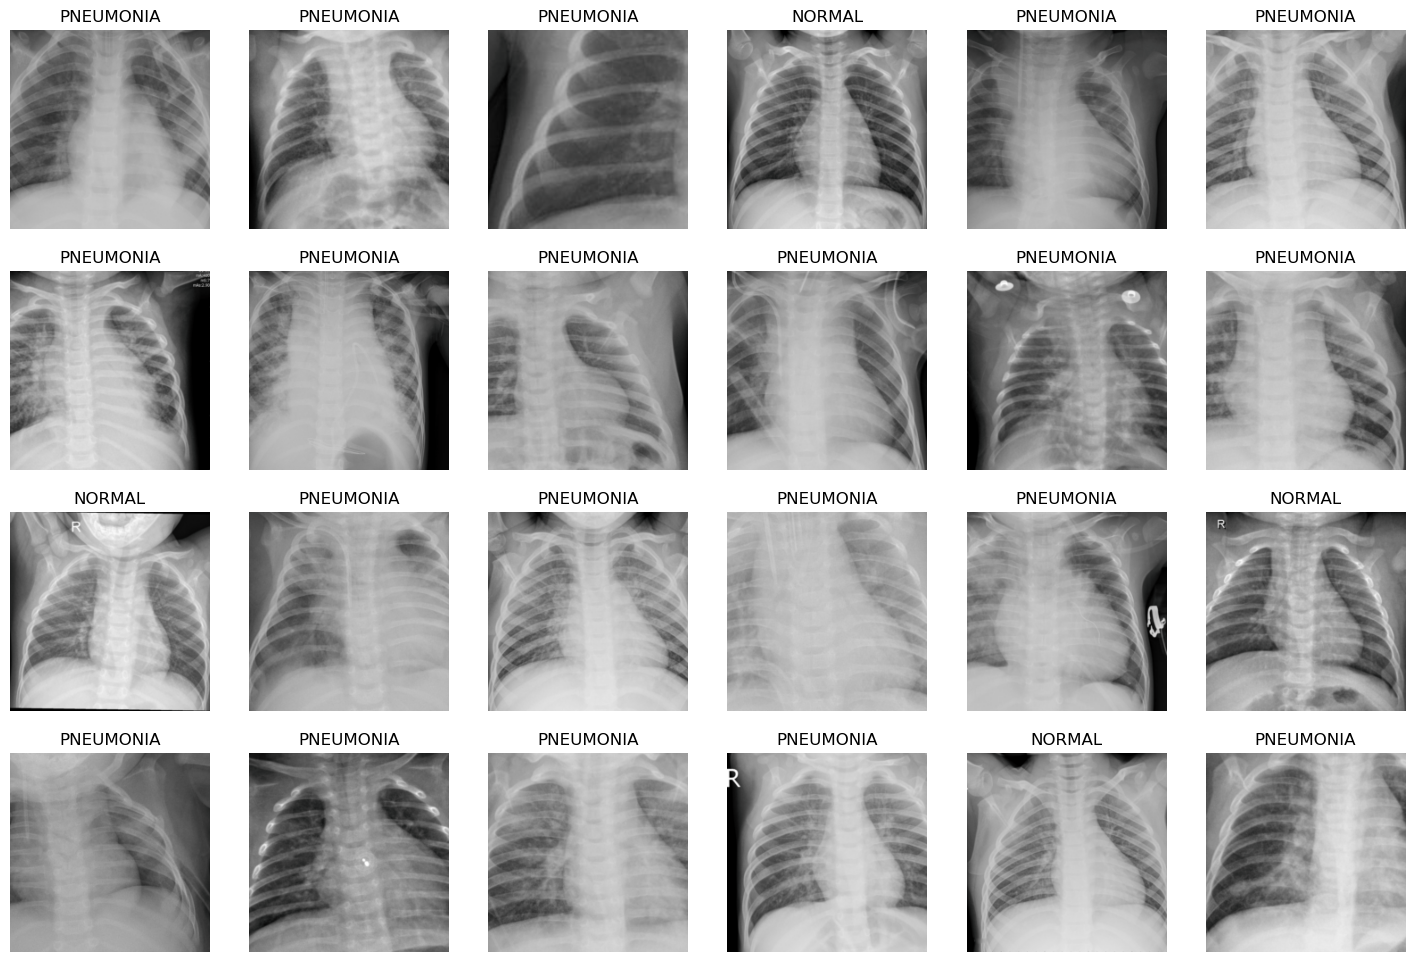

In [7]:
dls.train.show_batch(max_n=24,nrows=4)

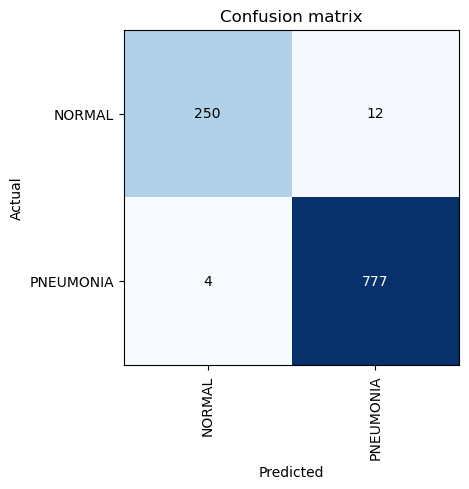

In [8]:
intp = ClassificationInterpretation.from_learner(learn)
intp.plot_confusion_matrix()

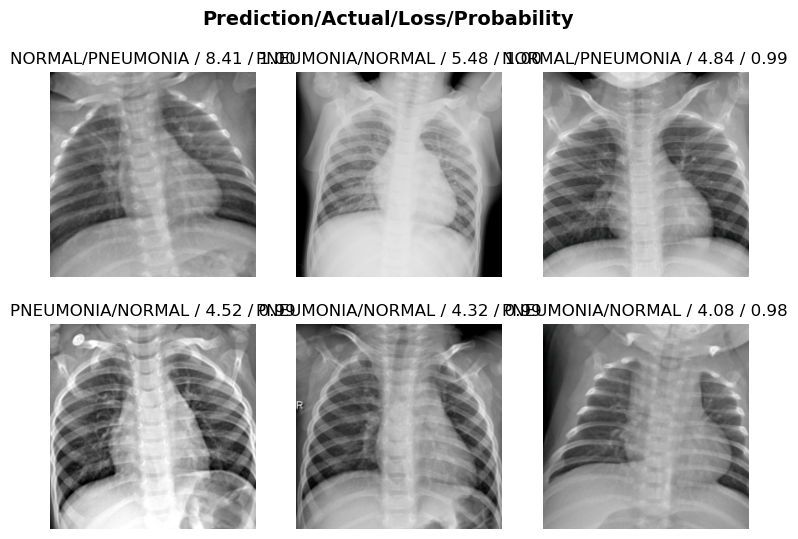

In [9]:
intp.plot_top_losses(6) # model tomonidan eng yomon 6 korsatkichni korsatadi

In [10]:
df = pd.read_csv('../input/pnevmoniya/sample_solution.csv')
df

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,0
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,0
622,test_img_10623.jpeg,0


In [11]:
test1= '../input/pnevmoniya/test/'

In [12]:
for i in range(0,624):
    label = df.iloc[i,0]
    img = cv2.imread(test1+label)
    pred, _, prob = learn.predict(img)
    df.iloc[i,1] = pred

In [13]:
maping = {'PNEUMONIA': 1, 'NORMAL': 0}

df = df.replace({'labels': maping})

In [14]:
df.to_csv('submission.csv', index=False)